<a href="https://colab.research.google.com/github/Muhammad-Bilal-Arshad/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**House Price Prediction**

Importing the dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
#from sklearn.metrics import accuracy_score     Accuracy score is not use to find the accuracy for  regression problem
from sklearn import metrics

importing the boston house price dataset

In [4]:
#loadin the dataset to a pandas dataframe
house_price_dataset = pd.read_csv('/content/sample_data/Boston.csv')

In [5]:
house_price_dataset.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
house_price_dataset = house_price_dataset.rename(columns={"medv":"price"})
house_price_dataset.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [12]:
#checking the number of rows and column in the dataset
house_price_dataset.shape

(506, 15)

In [13]:
#Checking for any missing values
house_price_dataset.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
price         0
dtype: int64

Statistical measure of the dataset

In [14]:
house_price_dataset.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Understanding the corelation between various features in the dataset

Types of corelation:

1.   Positive corelation
2.   Negative Corelation

In [16]:
correlation = house_price_dataset.corr()
print(correlation)

            Unnamed: 0      crim        zn     indus      chas       nox  \
Unnamed: 0    1.000000  0.407407 -0.103393  0.399439 -0.003759  0.398736   
crim          0.407407  1.000000 -0.200469  0.406583 -0.055892  0.420972   
zn           -0.103393 -0.200469  1.000000 -0.533828 -0.042697 -0.516604   
indus         0.399439  0.406583 -0.533828  1.000000  0.062938  0.763651   
chas         -0.003759 -0.055892 -0.042697  0.062938  1.000000  0.091203   
nox           0.398736  0.420972 -0.516604  0.763651  0.091203  1.000000   
rm           -0.079971 -0.219247  0.311991 -0.391676  0.091251 -0.302188   
age           0.203784  0.352734 -0.569537  0.644779  0.086518  0.731470   
dis          -0.302211 -0.379670  0.664408 -0.708027 -0.099176 -0.769230   
rad           0.686002  0.625505 -0.311948  0.595129 -0.007368  0.611441   
tax           0.666626  0.582764 -0.314563  0.720760 -0.035587  0.668023   
ptratio       0.291074  0.289946 -0.391679  0.383248 -0.121515  0.188933   
black       

<Axes: >

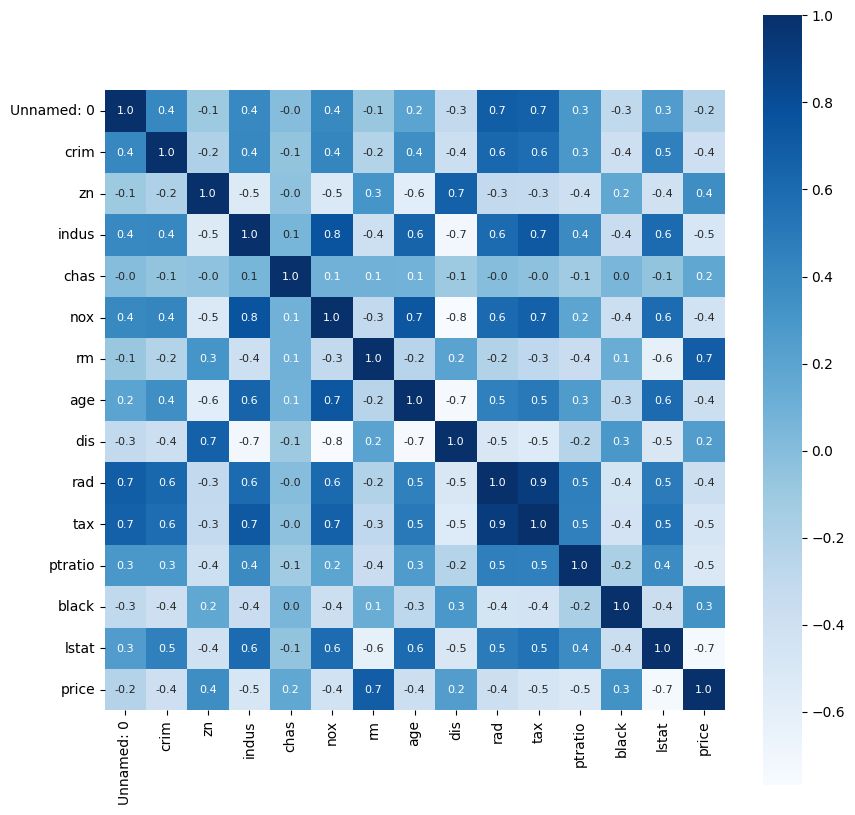

In [17]:
#As from the above data, we cannot understand the correlation between different features.
#constructing a heatmap to understand the correlation
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt ='.1f', annot = True, annot_kws = {'size': 8}, cmap = 'Blues' )

#cbar = True: means visibilty ofcolor bar
#square means we want all the value in the form of the square
#annot = '.1f' means we want only one value after the decimal point
# annot: True all the featuer name is in the annot
#annot kws size is the size of the box

Splitting the data and target

In [18]:
X = house_price_dataset.drop(columns = 'price', axis = 1)   #X = house_price_dataset.drop(['price'], axis = 1)
Y = house_price_dataset['price']

In [19]:
print(X)
print(Y)

     Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0             1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1             2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2             3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3             4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4             5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502         503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503         504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1   
504         505  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1   
505         506  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1   

     tax  ptratio   black  lstat  
0   

Splitting the data into training and test data

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [21]:
print(X.shape,X_train.shape,X_test.shape)

(506, 14) (404, 14) (102, 14)


Model Training

XGBoost Regressor

In [22]:
#loading the model
model = XGBRegressor()

In [23]:
#training the model with X_train
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Evaluation


Prediction on training data

In [24]:
#We cannot use the accuracy score for regression problem
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [25]:
print(training_data_prediction)

[23.117859  20.981482  20.101786  34.686577  13.904756  13.501808
 21.994654  15.187422  10.888625  22.69959   13.808849   5.5958323
 29.804226  49.993874  34.89774   20.607157  23.384403  19.177439
 32.672836  19.616465  26.98869    8.398133  45.993176  21.712616
 27.092016  19.40664   19.308039  24.79513   22.613031  31.721067
 18.54537    8.696038  17.407867  23.69771   13.301063  10.493207
 12.69378   25.004425  19.70235   14.898138  24.197193  24.994766
 14.896188  17.001759  15.604529  12.693677  24.50036   14.99998
 50.003513  17.508444  21.178383  32.01131   15.605909  22.89984
 19.318901  18.704332  23.296082  37.223534  30.091934  33.101162
 21.003372  49.99026   13.401213   5.0013776 16.49144    8.39809
 28.66047   19.507273  20.602201  45.406334  39.8162    33.406643
 19.8294    33.40621   25.275373  50.00002   12.523859  17.456083
 18.596672  22.593172  50.010036  23.771536  23.3122    23.09877
 41.6956    16.10857   31.60627   36.072662   6.999091  20.389017
 19.989578  1